## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.integrate import simps
from numpy import trapz
import seaborn as sns
import re
from scipy import stats
%matplotlib inline

## Response rate

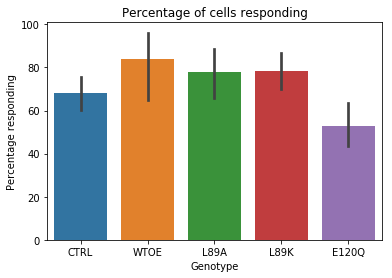

In [2]:
temp = pd.ExcelFile('../assets/to_combine/2018_12_04_combined_response.xlsx')
combined_response = temp.parse("Sheet1")
ax2 = sns.barplot(x = 'Genotype', data=combined_response, y="Percentage responding", ci=95,  order = ["CTRL", "WTOE", "L89A", "L89K", "E120Q"]).set_title('Percentage of cells responding')
fig = ax2.get_figure()
fig.savefig("2018_12_04_All_response_rate")

## Load Data

In [3]:
# Import excel file as a `pandas.ExcelFile' object (which basically has all sub-sheets in a big container!)
# also, only import 1302 rows

ca_data1 = pd.ExcelFile('../assets/to_combine/2018_09_15_CTRL_L89A_filtered_data.xlsx')
ca_data2 = pd.ExcelFile('../assets/to_combine/2018_09_25_stable_MB231_CTRL_E120Q_3_uM_UTP_Ca2+_free.xlsx')
ca_data3 = pd.ExcelFile('../assets/to_combine/2018_10_01_stable_MB231_CTRL_WTOE_ 3 uM UTP Ca2+_free_filtered.xlsx')
ca_data4 = pd.ExcelFile('../assets/to_combine/2018_11_30_MB231_CTRL_L89K_3_um_Ca_free_part_filtered.xlsx')
ca_data5 = pd.ExcelFile('../assets/to_combine/2018_12_03_MB231_CTRL_L89A_L89K_KO_L89A_3_um_Ca_free_filtered_data.xlsx')

In [4]:
ca_data_11 = ca_data1.parse("Sheet1")
ca_data_12 = ca_data2.parse("Sheet1")
ca_data_13 = ca_data3.parse("Sheet1")
ca_data_14 = ca_data4.parse("Sheet1")
ca_data_15 = ca_data5.parse("Sheet1")

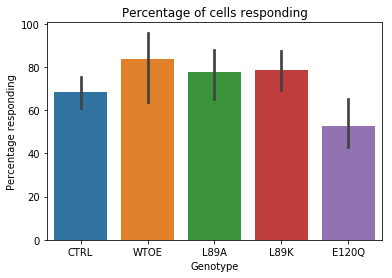

In [5]:
temp = pd.ExcelFile('../assets/to_combine/2018_12_04_combined_response.xlsx')
combined_response = temp.parse("Sheet1")
ax2 = sns.barplot(x = 'Genotype', data=combined_response, y="Percentage responding", ci=95,  order = ["CTRL", "WTOE", "L89A", "L89K", "E120Q"]).set_title('Percentage of cells responding')
fig = ax2.get_figure()
fig.savefig("2018_12_04_All_response_rate")

In [6]:
ca_data = pd.concat([ca_data_11, ca_data_12, ca_data_13, ca_data_14, ca_data_15], axis=1,join_axes=[ca_data_14.index])
ca_data_UTP = ca_data.loc[40:600]

# Find area under the curve

In [14]:
#Select just the range of appropriate UTP response
column_names = ca_data_UTP.columns
area = pd.DataFrame()
for column_name in column_names:
    temp1 = {column_name: ca_data_UTP[column_name]}
    temp2 = temp1[column_name] -1 #subtract value by 1 to get rid of baseline problem
    y = np.array(temp2)
    area_temp = trapz(y)
    #f area_temp > 0: #remove negative area values
    temp3 = pd.DataFrame([column_name],[area_temp])
    area = pd.concat([area, temp3], axis=0)
area = area.reset_index()   
area.columns = ['Area', 'Cell type']

In [15]:
pattern_ctrl = re.compile("CTRL.*")
pattern_l89a = re.compile("L89A.*")
pattern_l89k = re.compile("L89K.*")
pattern_wtoe = re.compile("WT.*")
pattern_e120q = re.compile("E120Q.*")

cell_name = pd.DataFrame()

for i, row in area.iterrows():
    temp1 =str(row["Cell type"])
    if pattern_ctrl.match(temp1):
        temp2 = pd.DataFrame(['CTRL'])
        cell_name = pd.concat([cell_name, temp2], axis=0)
    if pattern_l89a.match(temp1):
        temp3 = pd.DataFrame(['L89A'])
        cell_name = pd.concat([cell_name, temp3], axis=0, ignore_index=True)
    if pattern_l89k.match(temp1):
        temp4 = pd.DataFrame(['L89K'])
        cell_name = pd.concat([cell_name, temp4], axis=0, ignore_index=True)
    if pattern_wtoe.match(temp1):
        temp5 = pd.DataFrame(['WT'])
        cell_name = pd.concat([cell_name, temp5], axis=0, ignore_index=True)
    if pattern_e120q.match(temp1):
        temp6 = pd.DataFrame(['E120Q'])
        cell_name = pd.concat([cell_name, temp6], axis=0, ignore_index=True)
area_to_plot = pd.concat([area, cell_name], axis=1, ignore_index=True)
area_to_plot.columns = ['Area', 'Cell identifier', 'Cell type']

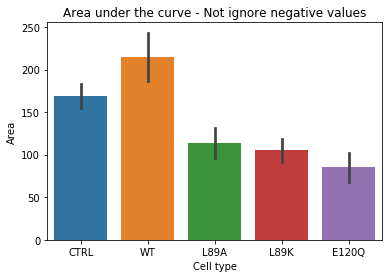

In [17]:
ax2= sns.barplot(x = 'Cell type', data=area_to_plot, y="Area", ci=95,  order = ["CTRL", "WT", "L89A",'L89K', "E120Q"]).set_title('Area under the curve - Not ignore negative values')
fig = ax2.get_figure()
fig.savefig("2018_12_04_All_area_under_the_curve_not_ignore_negative")

# Find max amplitude

In [10]:
max_amplitude = pd.DataFrame()
max_amp = pd.DataFrame()
for column_name in column_names:
    temp1 = ca_data_UTP[column_name].max()
    temp2 = pd.DataFrame()
    temp2 = {'Cell type': [column_name], 'Max amplitude': [temp1]}
    temp3 = pd.DataFrame(temp2)
    max_amplitude = pd.concat([max_amplitude, temp3], axis=0)
max_amplitude = max_amplitude.reset_index()

In [11]:
pattern_ctrl = re.compile("CTRL.*")
pattern_l89a = re.compile("L89A.*")
pattern_l89k = re.compile("L89K.*")
pattern_wtoe = re.compile("WT.*")
pattern_e120q = re.compile("E120Q.*")

cell_name_2 = pd.DataFrame()
max_amplitude_to_plot = pd.DataFrame()

for i, row in max_amplitude.iterrows():
    temp1 =str(row["Cell type"])
    if pattern_ctrl.match(temp1):
        temp2 = pd.DataFrame(['CTRL'])
        cell_name_2 = pd.concat([cell_name_2, temp2], axis=0)
    if pattern_l89a.match(temp1):
        temp3 = pd.DataFrame(['L89A'])
        cell_name_2 = pd.concat([cell_name_2, temp3], axis=0, ignore_index=True)
    if pattern_l89k.match(temp1):
        temp4 = pd.DataFrame(['L89K'])
        cell_name_2 = pd.concat([cell_name_2, temp4], axis=0, ignore_index=True)
    if pattern_wtoe.match(temp1):
        temp5 = pd.DataFrame(['WT'])
        cell_name_2 = pd.concat([cell_name_2, temp5], axis=0, ignore_index=True)
    if pattern_e120q.match(temp1):
        temp6 = pd.DataFrame(['E120Q'])
        cell_name_2 = pd.concat([cell_name_2, temp6], axis=0, ignore_index=True)
max_amplitude_to_plot = pd.concat([max_amplitude, cell_name_2], axis=1, ignore_index=True)
max_amplitude_to_plot.columns = ['Eh','Cell identifier', 'Max amplitude', 'Cell type']

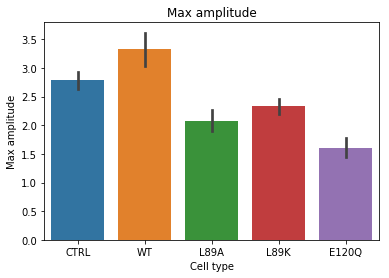

In [12]:
ax2= sns.barplot(x = 'Cell type', data=max_amplitude_to_plot, y="Max amplitude", ci=95,  order = ["CTRL", "WT", "L89A",'L89K', "E120Q"]).set_title('Max amplitude')
fig = ax2.get_figure()
fig.savefig("2018_12_04_All_max_amplitude")